In [1]:
import pyzx as zx
import random
from matplotlib import pyplot as plt
from copy import deepcopy

## Clifford Circuit

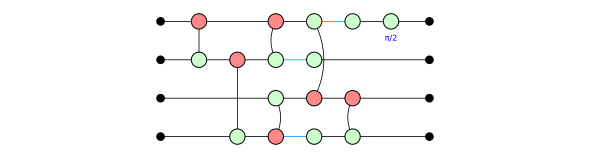

In [2]:
qubit_amount = 4
depth = 10
random.seed(555)
circ = zx.generate.CNOT_HAD_PHASE_circuit(qubit_amount, depth, clifford=True)
zx.draw_matplotlib(circ)

In [3]:
print(circ.__class__)

<class 'pyzx.circuit.Circuit'>


### Interior_Clifford_simp の場合
Keeps doing the simplifications ``id_simp``, ``spider_simp``,
``pivot_simp`` and ``lcomp_simp`` until none of them can be applied anymore.

In [4]:
g = circ.to_graph() # to_graph で、Circuit -> Graph.S
print(g.__class__)

<class 'pyzx.graph.graph_s.GraphS'>


In [123]:
zx.simplify.interior_clifford_simp(g)

spider_simp: 3. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 2.  1 iterations
id_simp: 1.  1 iterations


2

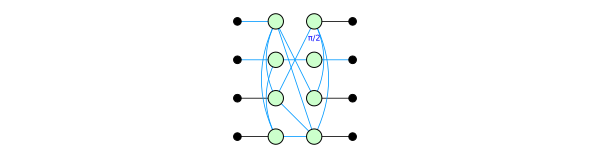

In [124]:
g.normalize()
zx.draw_matplotlib(g)

In [125]:
circ1 = zx.extract_clifford_normal_form(g)
circ1 = zx.basic_optimization(circ1)

<class 'pyzx.circuit.Circuit'>
Circuit  on 4 qubits with 17 gates.
        0 is the T-count
        17 Cliffords among which
        10 2-qubit gates (9 CNOT, 1 other) and
        3 Hadamard gates.


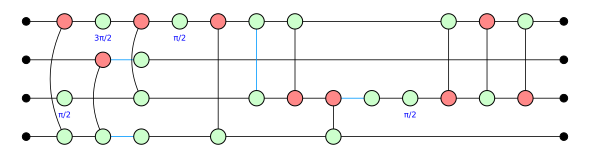

In [126]:
print(circ1.__class__)
print(circ1.stats())
zx.draw_matplotlib(circ1)

In [127]:
g1 = deepcopy(g)
circ2 = zx.extract_circuit(g1)

Warning:
        Note that this function changes the graph `g` in place. 
        In particular, if the extraction fails, the modified `g` shows 
        how far the extraction got. If you want to keep the original `g`
        then input `g.copy()` into `extract_circuit`.
    """

error


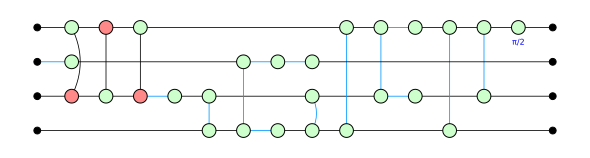

In [128]:
try:
    circ2 = zx.basic_optimization(circ2, do_swaps=False)
except Exception as e:
    print("error")
zx.draw_matplotlib(circ2)

### Clifford Simp の場合
Keeps doing rounds of :func:`interior_clifford_simp` and :func:`pivot_boundary_simp` until they can't be applied anymore.

In [67]:
g1 = circ.to_graph()
zx.simplify.clifford_simp(g1, quiet=False)

spider_simp: 3. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 2.  1 iterations
id_simp: 1.  1 iterations


2

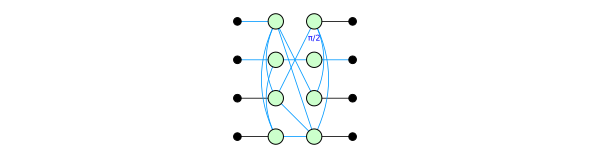

In [68]:
g1.normalize()
zx.draw_matplotlib(g1)

### Full Reduce の場合
a combination of :func:`clifford_simp` and
the gadgetization strategies :func:`pivot_gadget_simp` and :func:`gadget_simp`.

In [69]:
g2 = circ.to_graph()
zx.simplify.full_reduce(g2, quiet=False)

spider_simp: 3. 1.  2 iterations
id_simp: 1.  1 iterations
spider_simp: 1.  1 iterations
pivot_simp: 2.  1 iterations
id_simp: 1.  1 iterations


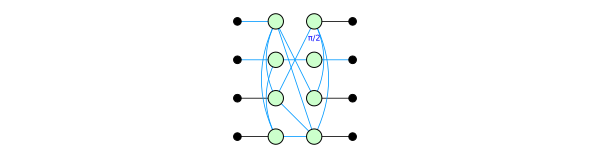

In [70]:
g2.normalize()
zx.draw_matplotlib(g2)

結論、Graph theoretic にも書いてあるように、interior_clifford + Pivot Boundary ですべての Clifford diagram は、graph like な簡約化を達成する。
Gadget などは使わない。